<a href="https://colab.research.google.com/github/afriveros/LaboratorioECCIBigData/blob/main/Laboratorio_cars_price_prediction_regresion_lienal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Santiago Guerrero Chamorro
Cars Price usando Suzuki Gixxer


## Data understanding

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load data

In [61]:
import pandas as pd

file_path = '/content/usedCarsCol_Gixxer_200624suzuki.csv'
cols = ['model', 'price', 'year', 'kms', 'color', 'fueltype']

# Adjust the separator if necessary
data = pd.read_csv(file_path, sep=',', names=cols, header=0, encoding='latin-1')
print(data.shape)
data.head()



(213, 6)


,model,price,year,kms,color,fueltype
0,Suzuki Gixxer 250,$15.580.000,2024,0.0,Azul,Gasolina
1,"Suzuki Gixxer 250 Modelo, 2023, 12 Mil KilÃ³me...",$12.900.000,2023,12.0,Negro,Gasolina
2,Suzuki Gixxer 150 Fi 2023,$9.900.000,2023,10.0,Negro,Gasolina
3,Suzuki Gixxer 150 Fi 2022,$8.900.000,2022,11.0,Negro,Gasolina
4,Suzuki Gixxer 150 2020,$6.800.000,2020,26.0,Negro,Gasolina


### Verify data types

In [62]:
data.dtypes

model        object
price        object
year          int64
kms         float64
color        object
fueltype     object
dtype: object

### Count unique values for each variable

In [63]:
data.nunique()

model       135
price        79
year         10
kms         117
color         8
fueltype      4
dtype: int64

In [64]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Suzuki Gixxer 250 ', 'Suzuki Gixxer 250 Modelo, 2023, 12 Mil KilÃ³metros', 'Suzuki Gixxer 150 Fi 2023', 'Suzuki Gixxer 150 Fi 2022', 'Suzuki Gixxer 150 2020', 'Suzuki Gixxer 250 2022', 'Suzuki Gixxer 155 2019 ', 'Suzuki Gixxer 155 2021 ', 'Suzuki Gixxer 150 Fi Abs 2022', 'Suzuki Gixxer 155 2020', 'Suzuki Gixxer 250 2023', 'Suzuki Gixxer Sf 250 2020', 'Suzuki Gixxer 250 2021', 'Suzuki Gixxer 250', 'Suzuki Gixxer Sf 155 2017', 'Gixxer F1 150 Abs Suzuki', 'Suzuki Gixxer 150 2023', 'Suzuki Gixxer 150', 'Suzuki Gixxer 250 2023 Â¡unico DueÃ±o! Â¡recibo Moto!', 'Suzuki Gixxer 250 Fi Abs 2022', 'Suzuki Gixxer 250 Sf 2022', 'Suzuki Gixxer 250, Modelo 2023, 11.000 K', 'Gixxer 250', 'Suzuki - Gixxer Sf 250 Modelo 2025', 'Suzuki - Gixxer 250 Modelo 2025', 'Suzuki - Gixxer Fi Modelo 2025', 'Suzuki - Gixxer Fi Abs Modelo 2025', 'Suzuki Gixxer 250 Mod. 2023', 'Suzuki Gixxer 250 Modelo 2021 Ã\x9anico DueÃ±o', ' ', 'Suzuki Gixxer Fi Abs', 'Suzuki Gixxer Sf 250', 'Suzuki Gixxer Fi Sin Abs', 'Suzuki Gi

### Data transformation

In [65]:
# Copy data and remove model variable
datacc = data
datacc = datacc.drop(['model'], axis=1)
datacc.shape

(213, 5)

#### Transform $price$ to numerical

In [66]:
datacc['price'] = datacc['price'].str.replace(r'[$.]', '', regex=True).astype(int)

##### Transform $kms$ to numerical

In [67]:
# Elimina puntos decimales en la columna 'kms'
datacc['kms'] = datacc['kms'].astype(str).str.replace(r'[.]', '', regex=True).astype(int)


In [68]:
datacc.replace({'kms': {'Publicado': 0}}, inplace=True)

In [69]:
datacc['kms'] = datacc['kms'].replace('[.]','',regex=True).astype(int)

##### Transform categorical variables to dummies: $year$ and $fuel type$

In [70]:
# Object to categorical
datacc['color'] = datacc['color'].astype('category')
datacc['fueltype'] = datacc['fueltype'].astype('category')
datacc.dtypes

price          int64
year           int64
kms            int64
color       category
fueltype    category
dtype: object

In [71]:
# Convert to dummies
# Convert category to codes
datacc['color']  = pd.Categorical(datacc['color']).codes
datacc['fueltype']  = pd.Categorical(datacc['fueltype']).codes
datacc.head()

,price,year,kms,color,fueltype
0,15580000,2024,0,0,1
1,12900000,2023,120,5,1
2,9900000,2023,100,5,1
3,8900000,2022,110,5,1
4,6800000,2020,260,5,1


## Data Exploration

In [72]:
# Descriptive statistics
datacc.describe()[['price','year','kms']]

,price,year,kms
count,2.130000e+02,213.000000,213.000000
mean,1.000396e+07,1775.309859,1446.309859
std,4.466091e+06,663.534147,6133.449251
min,0.000000e+00,0.000000,0.000000
25%,8.400000e+06,2020.000000,80.000000
50%,1.140000e+07,2022.000000,190.000000
75%,1.300000e+07,2023.000000,347.000000
max,1.653000e+07,2025.000000,56888.000000


#### Histograms

Text(0.5, 1.0, '$kms$')

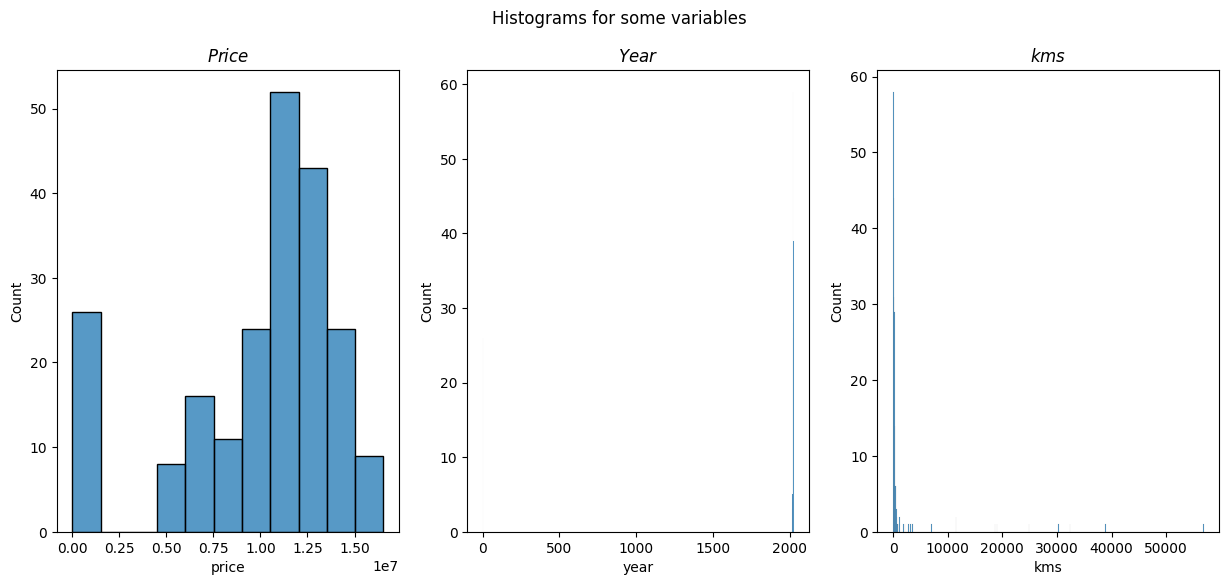

In [73]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

En el histograma podemos ver lo siguiente:
Precio (Price): Este histograma muestra la distribución de ‘Precio’. El rango va de 0 a 1.5e7 en el eje x y una cuenta hasta 60 en el eje y. La forma del histograma sugiere que hay más elementos (posiblemente coches, dado el contexto de ‘Año’ y ‘Kms’) en rangos de precios más bajos que en los más altos. Esto podría indicar que los elementos de precio más bajo son más comunes o preferidos en este conjunto de datos.
Año (Year): Este histograma representa ‘Año’ con un rango aproximado de 500 a 2000 en el eje x y una cuenta hasta 60 en el eje y. La distribución parece bastante uniforme, lo que podría sugerir que los datos de los años están bien distribuidos en este rango.
Kilómetros (Kms): Este histograma es para ‘Kms’ con un rango en el eje x que se extiende de 0 a alrededor de 50000 y una cuenta hasta 60 en el eje y. La forma del histograma sugiere que hay más coches con kilometraje más bajo en este conjunto de datos.

#### Boxplots

<Axes: >

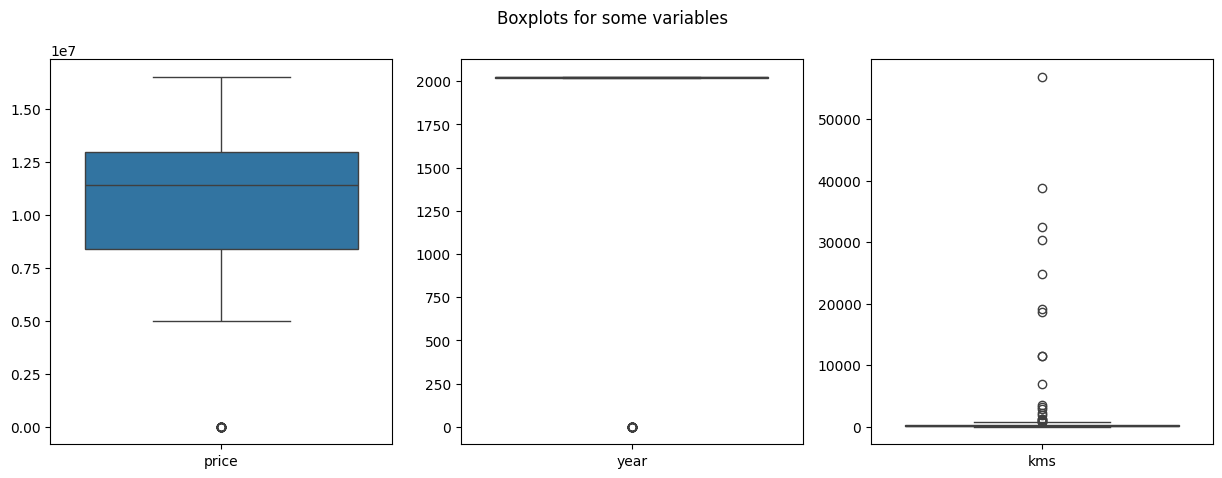

In [74]:
### Boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Al analizar el boxplots, podemos ver lo siguiente en cada variable:
Precio (Price): Este boxplot muestra la distribución de ‘Precio’. Los boxplots son una forma estandarizada de mostrar la distribución de los datos basada en un resumen de cinco números: mínimo, primer cuartil (Q1), mediana, tercer cuartil (Q3) y máximo. En este caso, parece que hay algunos valores atípicos en el extremo superior del rango de precios, lo que podría indicar la presencia de algunos elementos con precios significativamente más altos que la mayoría.
Año (Year): Este boxplot representa ‘Año’. La mediana parece estar alrededor del año 2000, y la mayoría de los datos se encuentran entre aproximadamente 1750 y 2250. No parece haber valores atípicos en este caso, lo que indica que todos los años en este conjunto de datos están dentro de un rango esperado.
Kilómetros (Kms): Este boxplot es para ‘Kms’. La mediana está cerca de 25000 kms, y la mayoría de los datos se encuentran entre 0 y 50000 kms. Hay algunos valores atípicos en el extremo superior, lo que podría indicar la presencia de algunos elementos con kilometrajes significativamente más altos que la mayoría.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

<Axes: >

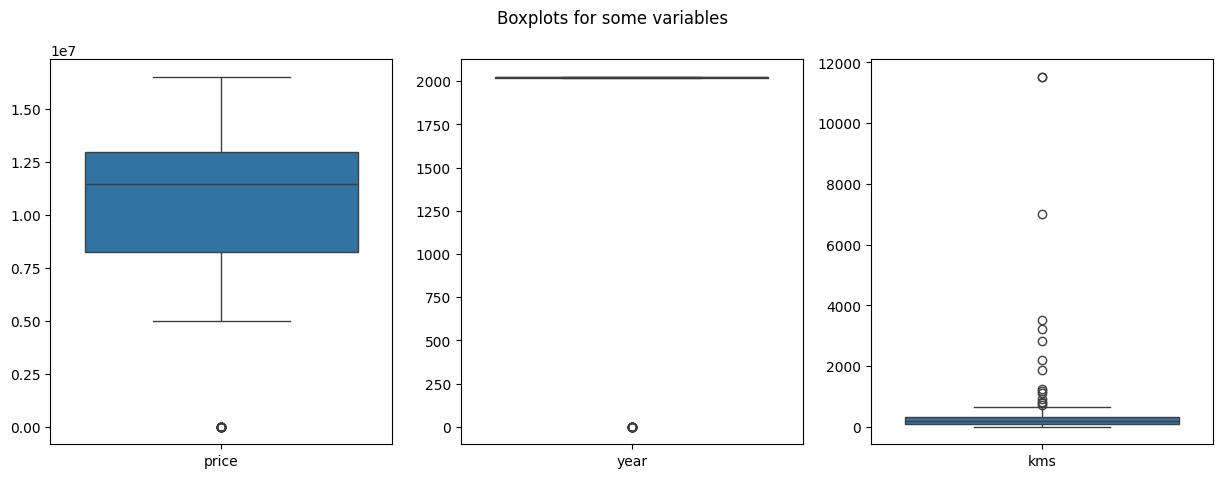

In [75]:
# Z score to eliminate outliers of 'year' and 'kms'
from scipy import stats

#find absolute value of z-score for each observation of 'kms'
z2 = np.abs(stats.zscore(datacc['kms']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.kms[(z2>2)].index
datacc = datacc.drop(toremove)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Text(0.5, 1.0, '$kms$')

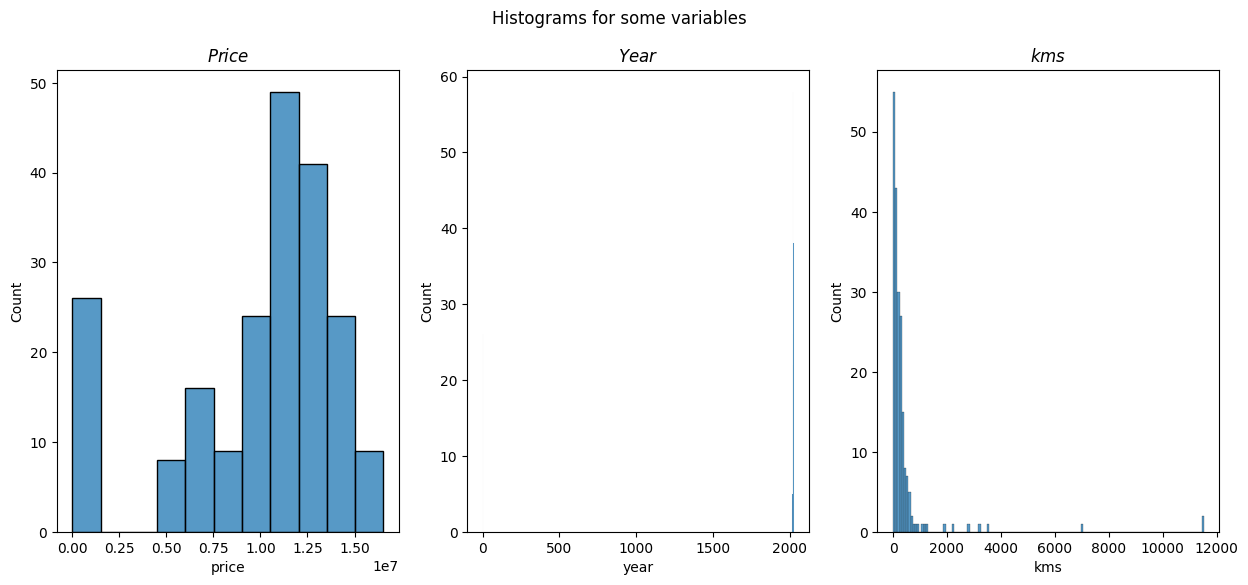

In [76]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

El gráfico proporcionado despues de realizar el analisis correspondiente nos muestra tres histogramas que representan diferentes variables: Precio, Año y Kilómetros (Kms). Cada histograma ofrece una visión visual de la distribución de estas variables, lo cual es esencial para el análisis de datos.

Precio (Price): El histograma de ‘Precio’ muestra una distribución sesgada hacia la derecha. Esto indica que la mayoría de los precios son bajos, con algunos precios significativamente más altos. La concentración de datos en el extremo inferior del rango de precios sugiere que los elementos de precio más bajo son más comunes en este conjunto de datos. Los valores atípicos en el extremo superior podrían indicar la presencia de algunos elementos con precios significativamente más altos que la mayoría.
Año (Year): El histograma de ‘Año’ parece estar sesgado hacia la izquierda, lo que indica que la mayoría de los datos se agrupan en años más recientes. Esto podría sugerir que la mayoría de los elementos en este conjunto de datos son relativamente nuevos. La ausencia de valores atípicos sugiere que todos los años en este conjunto de datos están dentro de un rango esperado.
Kilómetros (Kms): El histograma de ‘Kms’ muestra una distribución extremadamente sesgada hacia la derecha. Casi todos los valores están cerca de cero, con muy pocos que se extienden hacia kilómetros más altos. Esto podría indicar que la mayoría de los elementos en este conjunto de datos tienen un kilometraje bajo. Los valores atípicos en el extremo superior podrían representar elementos con un kilometraje significativamente más alto que la mayoría.

### EDA (Exploratory Data Analysis)

#### Correlations

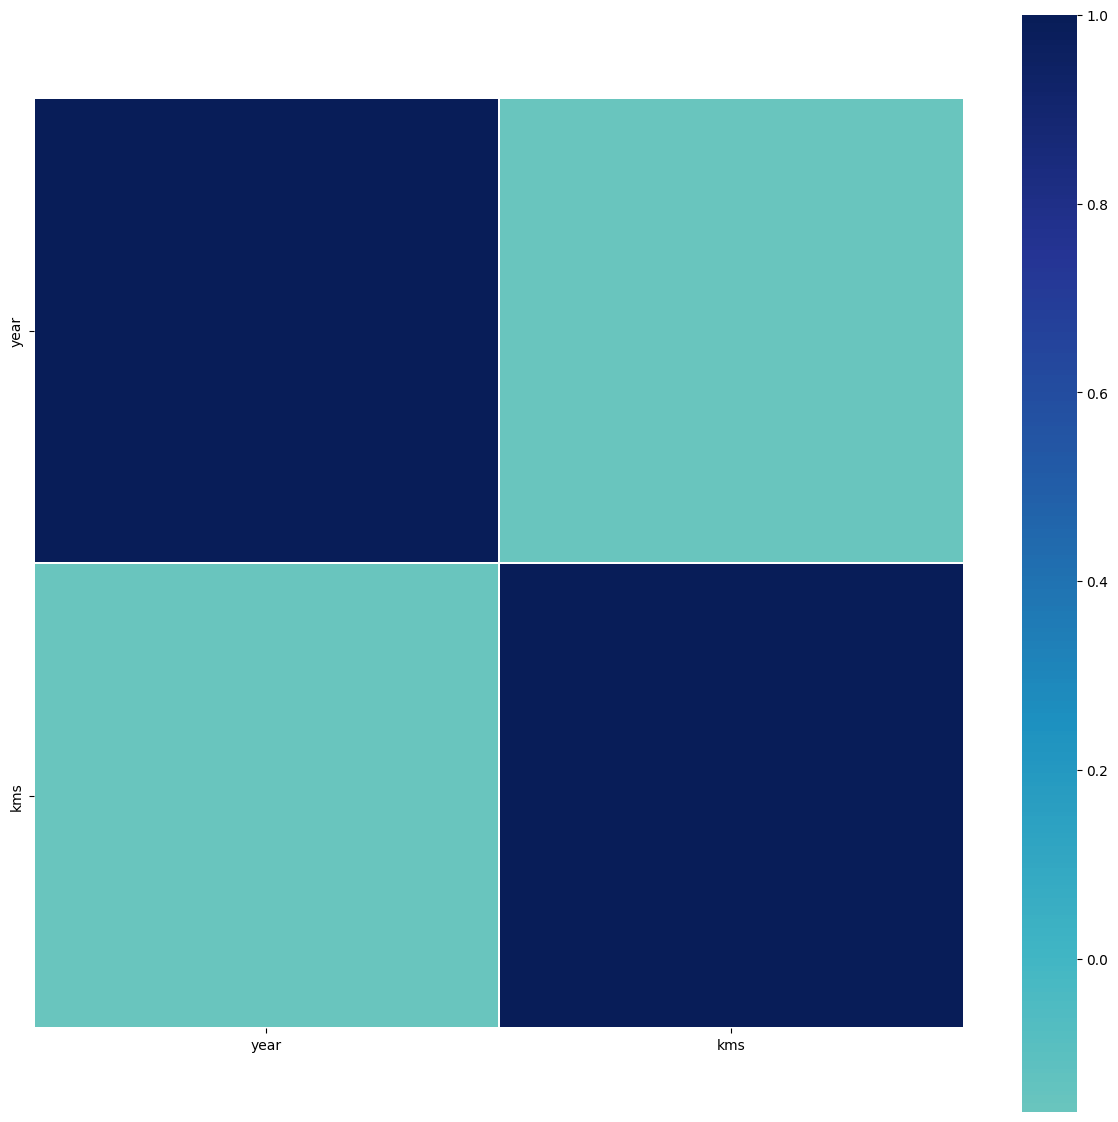

In [77]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

correlation_heatmap(X[['year', 'kms']])

En este mapa de calor, hay cuatro grandes cuadrados, cada uno representando un punto de datos con diferentes tonos de azul. La intensidad del color se correlaciona con el valor indicado por la escala de colores en el lado derecho del mapa de calor, que varía de 0.0 a 0.8. Cuanto más oscuro es el tono de azul, mayor es el valor que representa.

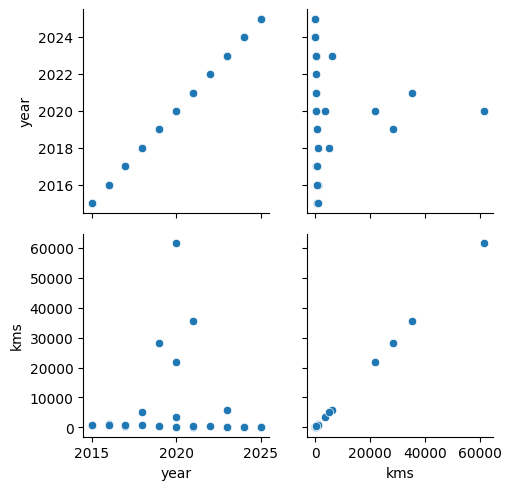

In [ ]:
g = sns.PairGrid(X[['year', 'kms']])
g.map(sns.scatterplot)

En la gráfica que vemos anteriormente podemos inferir lo siguiente:
Gráfico superior izquierdo (Año vs Kms): Este gráfico muestra ‘Año’ en el eje vertical y ‘Kms’ en el eje horizontal. Los puntos de datos están principalmente agrupados hacia la parte inferior del gráfico con algunos dispersos hacia arriba, lo que sugiere un aumento con el tiempo.
Gráfico superior derecho (Año vs Kms): Este gráfico también muestra ‘Año’ en el eje vertical y ‘Kms’ en el eje horizontal. Este gráfico muestra una distribución dispersa de puntos a través de ambos ejes sin un patrón claro.
Gráfico inferior izquierdo (Kms vs Año): Este gráfico muestra ‘Kms’ en el eje vertical y ‘Año’ en el eje horizontal. Los puntos de datos están fuertemente agrupados en el extremo inferior del eje vertical cerca de cero.
Gráfico inferior derecho (Kms vs Kms): Este gráfico muestra ‘Kms’ en ambos ejes. Hay una concentración de puntos hacia cero en ambos ejes, con algo de dispersión a lo largo de ambos ejes.

## Modeling: machine learning

### Libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

### Data partitioning


In [ ]:
X = datacc.copy()
X = X.drop(['price'], axis=1)
print(X.shape)

Y = pd.DataFrame()
Y = datacc['price']
print(Y.shape)

(51, 4)
(51,)


In [ ]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(51, 4)

In [ ]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.20,
                                         random_state=42)

[texto del vínculo](https://)### Multivariate lineal regression

In [ ]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 54540239.70
MAE: 40189490.00
R2: 0.19


**texto en negrita**### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 51233954.19
MAE: 33982890.29
R2: 0.29


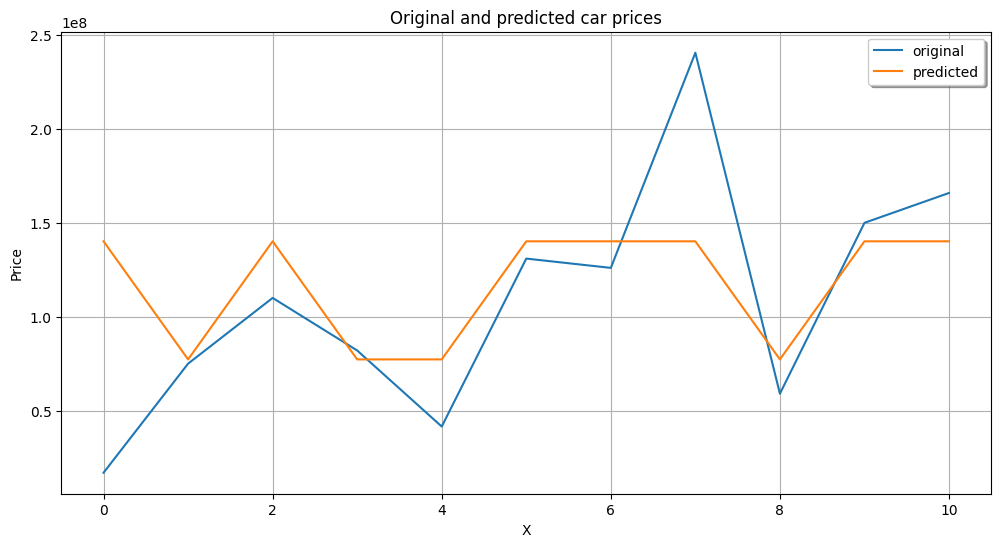

In [ ]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted car prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

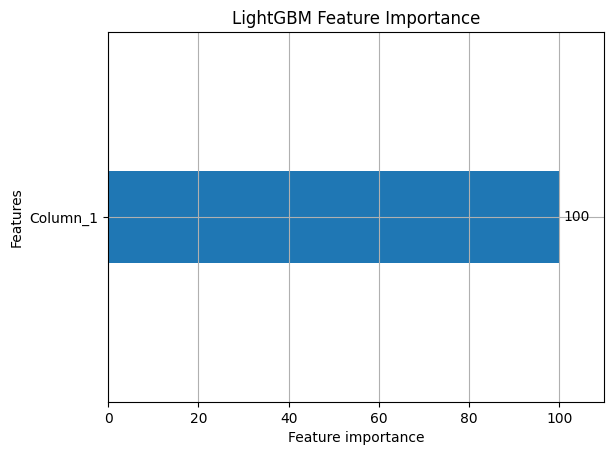

In [ ]:
# plotting feature importance
ax = lgb.plot_importance(model2, height=.5, title="LightGBM Feature Importance")


<Axes: >

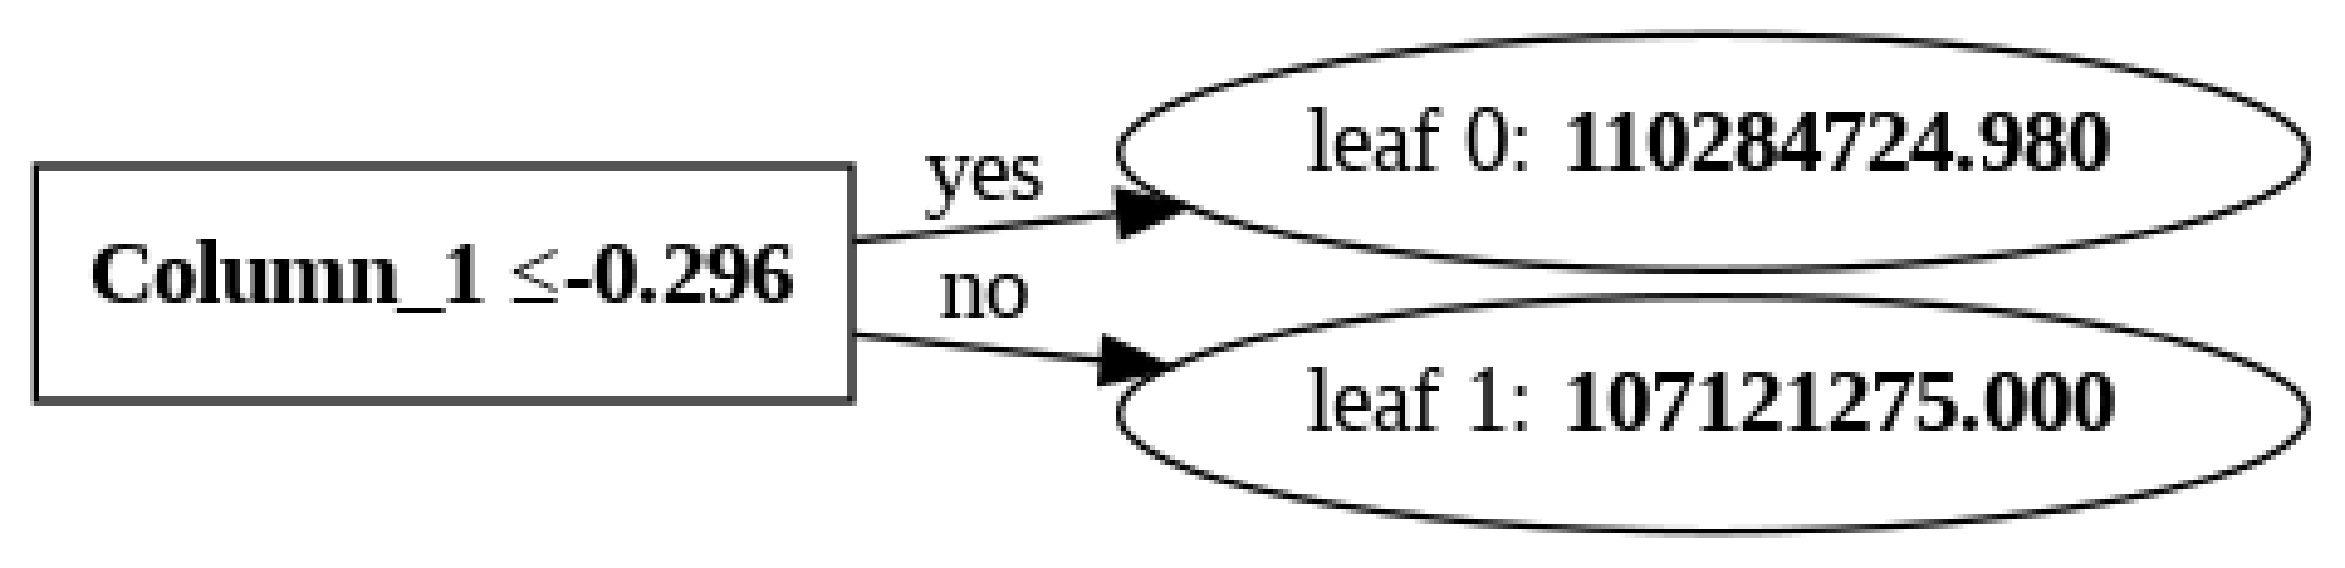

In [ ]:
lgb.plot_tree(model2,figsize=(30,40))



```
# Esto tiene formato de código
```

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 46796273.75
MAE: 34930270.63
R2: 0.40


**Save the model**

In [ ]:
with open('model3.pkl', 'wb') as f:
  pickle.dump(model3, f)

### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [ ]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

In [ ]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
# Pred
y_pred4 = model4.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Car Prices: real vs. predicted")
plt.legend()
plt.show()